In [32]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline


In [33]:
# respondents = pd.read_csv('data/atusresp_2014.dat')
# roster = pd.read_csv('data/atusrost_2014.dat')
# activity = pd.read_csv('data/atusact_2014.dat')

summary = pd.read_csv('data/atussum_2014.dat')
from summary_data import *
summary = summary.rename(columns=all_cols)


In [34]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11592 entries, 0 to 11591
Columns: 409 entries, case_id to Unable to code activity at 1st tier
dtypes: float64(1), int64(408)
memory usage: 36.3 MB


In [35]:
summary.head(5)

,case_id,stat_weight,age_youngest_child,age,sex,high_lvl_edu,race,hisp,metro,labor_status,...,Travel related to phone calls,"Travel rel. to phone calls, n.e.c.*",Security procedures related to traveling,"Security procedures related to traveling, n.e.c.*","Traveling, n.e.c.*",Insufficient detail in verbatim,Missing travel or destination,Respondent refused to provide information/'none of your business',Gap/can't remember,Unable to code activity at 1st tier
0,20140101140007,4891315.826760,0,20,2,39,1,1,1,4,...,0,0,0,0,0,0,0,0,0,0
1,20140101140011,23147368.359655,16,16,2,37,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20140101140028,20941823.429044,2,65,2,38,1,1,1,5,...,0,0,0,0,0,0,0,0,0,0
3,20140101140063,2505899.417166,-1,50,2,39,2,2,2,5,...,0,0,0,0,0,0,0,0,0,0
4,20140101140168,15928231.823165,8,23,2,39,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [36]:
summary.keys()

Index(['case_id', 'stat_weight', 'age_youngest_child', 'age', 'sex',
       'high_lvl_edu', 'race', 'hisp', 'metro', 'labor_status', 
       ...
       'Travel related to phone calls', 'Travel rel. to phone calls, n.e.c.*',
       'Security procedures related to traveling',
       'Security procedures related to traveling, n.e.c.*',
       'Traveling, n.e.c.*', 'Insufficient detail in verbatim',
       'Missing travel or destination',
       'Respondent refused to provide information/'none of your business'',
       'Gap/can't remember', 'Unable to code activity at 1st tier'],
      dtype='object', length=409)

## Level of Schooling by Sex

In [37]:
len(summary.high_lvl_edu.unique())

16

In [38]:
schooling = summary[['high_lvl_edu', 'sex']]
schooling.tail()

highest_edu_lvl = schooling['high_lvl_edu']
highest_edu_lvl.count()
# highest_edu_lvl.plot(title='Highest Level of Schooling Attained', kind='bar')

11592

In [39]:
female = schooling[schooling.sex==1].groupby('high_lvl_edu').count().reset_index()
male = schooling[schooling.sex==2].groupby('high_lvl_edu').count().reset_index()

school_by_sex = pd.merge(male, female, on='high_lvl_edu')
school_by_sex.pivot_table(index='high_lvl_edu')


,sex_x,sex_y
high_lvl_edu,,
31,8,11
32,42,27
33,74,66
34,121,115
35,131,138
36,161,153
37,173,178
38,65,59
39,1630,1263


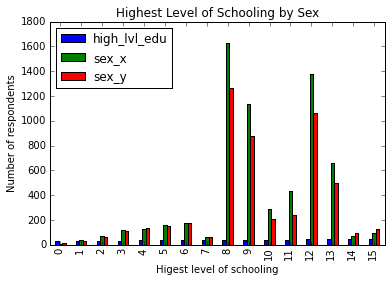

In [45]:
school_by_sex.high_lvl_edu.value_counts()

school_by_sex.plot(title='Highest Level of Schooling by Sex', legend=True, kind='bar')
plt.xlabel('Higest level of schooling')
plt.ylabel('Number of respondents')
plt.show()

## Number of Persons Working Full-time and also Using Interior Cleaning Services
We can see below that there are 3009 female and 2542 male respondents who are working full-time at the time of the survey.  How many respondents use interior cleaning services?

In [ ]:
ft_work = summary[summary['ft_pt'] == 1]
ft_work.sex.value_counts()

In [ ]:
cleaning_crew = summary[summary['Using interior cleaning services'] > 0]
cleaning_mean = cleaning_crew.mean()
# laundry = summary[summary['t020102'] > 0]
# laundry_mean = laundry['t020102'].mean()